# Explore Exercises

### Initial Setup

In [1]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.dates as mdates

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# web-based requests
import requests

# Importing the os library specifically for reading the csv once I've created the file in my working directory.
import os

import acquire
import prepare
from time import strftime

credentials loaded successfully
End of file.


Read df from .csv
Reformatted dates correctly
Set dates as index


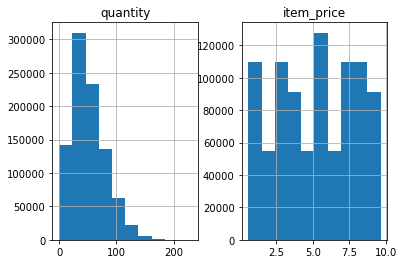

,item,quantity,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,Tuesday,294.00


In [2]:
# Prepping the dataframe:

df = prepare.prep_store_data()
df.head()

#### Checking the shape, info and dtype for my columns.

In [3]:
df.shape

(913000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   quantity       913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  day            913000 non-null  object 
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(7), obj

In [5]:
df.index.dtype

datetime64[ns, GMT]

In [6]:
# Adding year column. Need to add this to prep.
df.resample("D").sum()
df['year'] = df.index.year

In [7]:
# df.rename(columns = {'sales_total': 'revenue'}, inplace = True)
df.head()

,item,quantity,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total,year
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,10.92,2013
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,218.40,2013
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,125.55,2013
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,Tuesday,453.60,2013
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,Tuesday,294.00,2013


In [8]:
df.shape

(913000, 17)

# Exercises

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

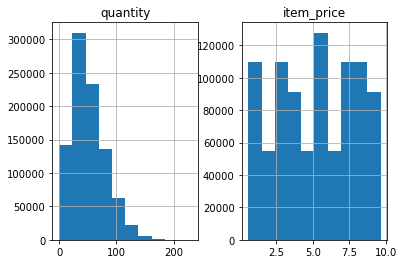

In [9]:
df[['quantity', 'item_price']].hist()
plt.show()

#### 1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [20]:
revenue_df = df[['sales_total']]
revenue_df.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,10.92
2013-01-01 00:00:00+00:00,218.40
2013-01-01 00:00:00+00:00,125.55
2013-01-01 00:00:00+00:00,453.60
2013-01-01 00:00:00+00:00,294.00


In [21]:
revenue_df = revenue_df.resample("D").sum()
revenue_df.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


#### 2. Validate your splits by plotting X_train and y_train.

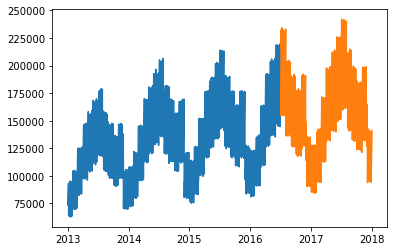

In [22]:
train_size = .70
n = revenue_df.shape[0]
test_start_index = round(train_size * n)

train = revenue_df[:test_start_index] # everything up (not including) to the test_start_index
test = revenue_df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total

In [23]:
train.shape, test.shape

((1278, 1), (548, 1))

In [25]:
train.shape[0] + test.shape[0] == df.resample("D").sales_total.sum().shape[0]

True

In [ ]:
# Creating the function:

def split_store_datas


In [26]:
# y is sales_total I believe, since that's what we are trying to predict.

y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Freq: D, Name: sales_total, dtype: float64

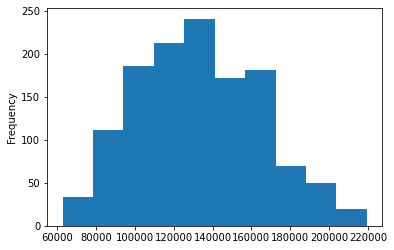

In [27]:
y.plot.hist()
plt.show()

In [28]:
train.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


#### 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

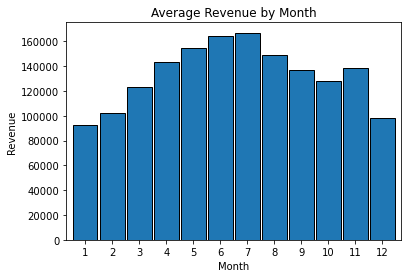

In [34]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Revenue by Month', xlabel='Month', ylabel='Revenue')
plt.show()

<AxesSubplot:ylabel='sales_total'>

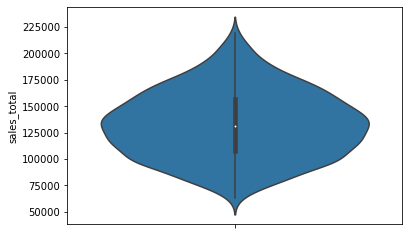

In [35]:
sns.violinplot(x = 'year', y = 'sales_total', data = train)

<AxesSubplot:xlabel='year', ylabel='sales_total'>

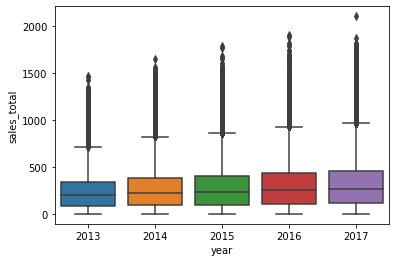

In [71]:
sns.boxplot(x = 'year', y = 'sales_total', data = df)

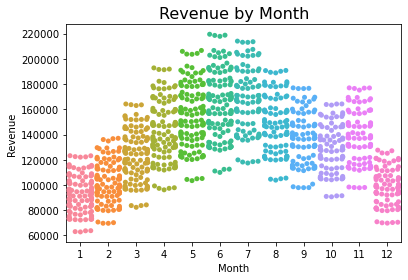

In [46]:
# plotting the chart:
swarmgraph = sns.swarmplot(x = y.index.month, y = 'sales_total', data = train)

# Labels and colors:
swarmgraph.set_title(label = "Revenue by Month", fontsize = 16)
swarmgraph.set_xlabel('Month')
swarmgraph.set_ylabel('Revenue')

#printing the completed chart (removes any extraneous):
plt.show()

#### 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

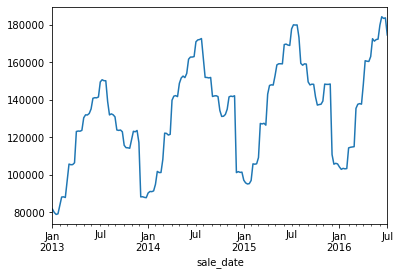

In [47]:
# Weekly average using resampling.

y.resample("W").mean().plot()
plt.show()

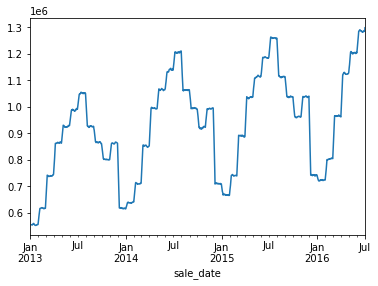

In [48]:
# 7 day moving average:

y.rolling(7).sum().plot()
plt.show()

<AxesSubplot:xlabel='sale_date'>

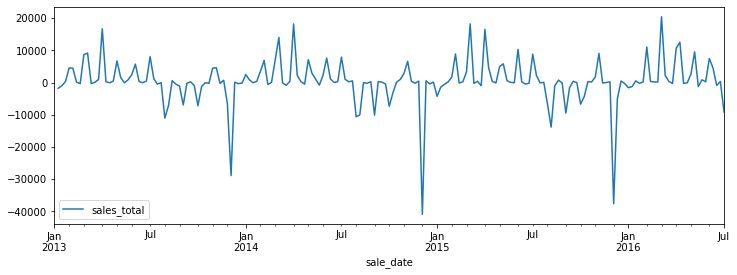

In [50]:
train.resample('W').mean().diff(periods=1).plot(figsize=(12,4))

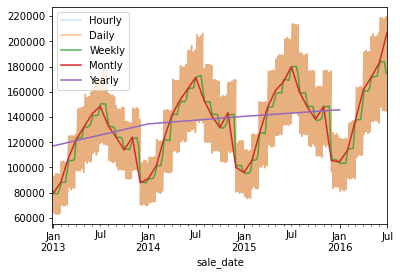

In [49]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

#### Lag Plots:

- First, showing a lag plot of 1 day.

Text(0.5, 1.0, 'Lag plot with lag=1')

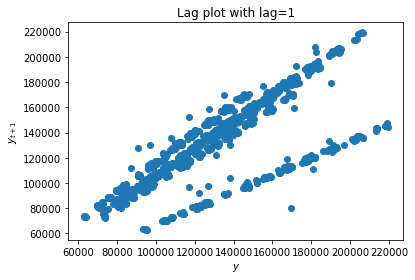

In [51]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

In [ ]:
# Seems to be a strong linear correlation, but interesting separate lines.

,this_week,16_weeks_out
sale_date,,
2013-01-06 00:00:00+00:00,81794.583333,123791.114286
2013-01-13 00:00:00+00:00,79990.601429,130500.534286
2013-01-20 00:00:00+00:00,78973.360000,132068.467143
2013-01-27 00:00:00+00:00,79272.691429,131983.811429
2013-02-03 00:00:00+00:00,83792.507143,132800.151429
...,...,...
2016-06-05 00:00:00+00:00,179882.295714,NaN
2016-06-12 00:00:00+00:00,184381.464286,NaN
2016-06-19 00:00:00+00:00,183473.044286,NaN


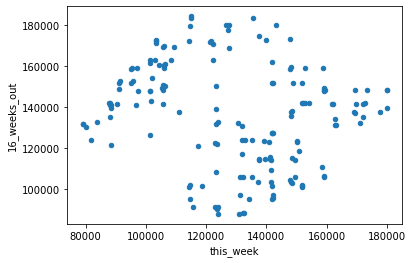

In [76]:
# Shifting by 16 weeks:

weekly = train.resample('W').mean()
weekly['16_weeks_out'] = weekly.sales_total.shift(-16)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='16_weeks_out')
weekly

#### Autocorrelation Plots

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

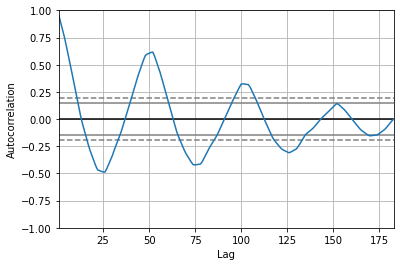

In [57]:
pd.plotting.autocorrelation_plot(train.sales_total.resample("W").mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

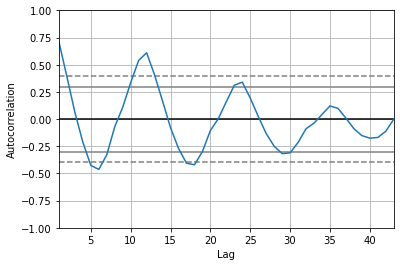

In [59]:
# Trying it with a different time interval. Only slight visual difference in the shape of the cosine wave, but x axis is 

pd.plotting.autocorrelation_plot(train.sales_total.resample("M").mean())

#### Plotting the min, mean, max and change in mean over time:

In [66]:
# I want to recreate that min/max/mean chart, but I'm stuck at a total number per day. So I need to resample by say, weekly, and then find the min/max/mean. Then use .agg and recreate that graph.

# Attempting to downsample by week using resample and .agg()

agg_train = train['sales_total'].resample("W").agg(['min', 'max', 'mean'])
agg_train.head()

,min,max,mean
sale_date,,,
2013-01-06 00:00:00+00:00,73570.58,93093.85,81794.583333
2013-01-13 00:00:00+00:00,63777.54,95210.11,79990.601429
2013-01-20 00:00:00+00:00,63034.32,94830.87,78973.360000
2013-01-27 00:00:00+00:00,62788.62,94626.29,79272.691429
2013-02-03 00:00:00+00:00,63666.67,104593.10,83792.507143


<AxesSubplot:xlabel='sale_date'>

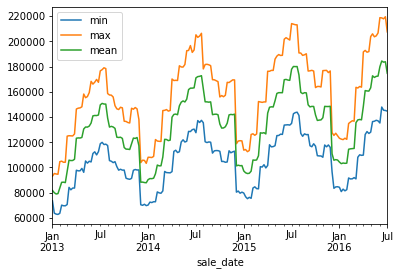

In [78]:
agg_train.plot()

In [185]:
agg_train.resample("W").max() - agg_train.resample("W").min()

,min,max,mean
sale_date,,,
2013-01-06 00:00:00+00:00,0.0,0.0,0.0
2013-01-13 00:00:00+00:00,0.0,0.0,0.0
2013-01-20 00:00:00+00:00,0.0,0.0,0.0
2013-01-27 00:00:00+00:00,0.0,0.0,0.0
2013-02-03 00:00:00+00:00,0.0,0.0,0.0
...,...,...,...
2016-06-05 00:00:00+00:00,0.0,0.0,0.0
2016-06-12 00:00:00+00:00,0.0,0.0,0.0
2016-06-19 00:00:00+00:00,0.0,0.0,0.0


In [182]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


AttributeError: 'RangeIndex' object has no attribute 'year'

#### Plotting a time series decomposition

In [86]:
import statsmodels.api as sm

In [90]:
y = train.sales_total.resample("W").mean()


result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({'y': result.observed, 'trend': result.trend, 'seasonal': result.seasonal, 'resid': result.resid})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,NaN,-38901.876390,NaN
2013-01-13 00:00:00+00:00,79990.601429,NaN,-38210.382887,NaN
2013-01-20 00:00:00+00:00,78973.360000,NaN,-38830.973862,NaN
2013-01-27 00:00:00+00:00,79272.691429,NaN,-38827.078436,NaN
2013-02-03 00:00:00+00:00,83792.507143,NaN,-36538.820195,NaN


<AxesSubplot:xlabel='sale_date'>

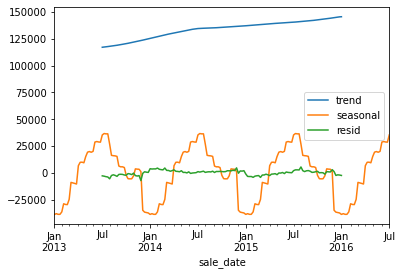

In [91]:
decomposition.iloc[:, 1:].plot()

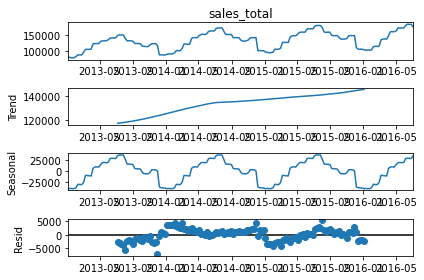

In [92]:
result.plot()
None

#### Categories over time

- Going to divide up the catgories by day, and see if there is any discernable trend. Also need to apply to the test set.

In [95]:
train['day'] = train.index.day_name()
train.head()

,sales_total,day
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,Tuesday
2013-01-02 00:00:00+00:00,73570.58,Wednesday
2013-01-03 00:00:00+00:00,78169.48,Thursday
2013-01-04 00:00:00+00:00,84467.73,Friday
2013-01-05 00:00:00+00:00,87621.85,Saturday


<AxesSubplot:xlabel='sale_date'>

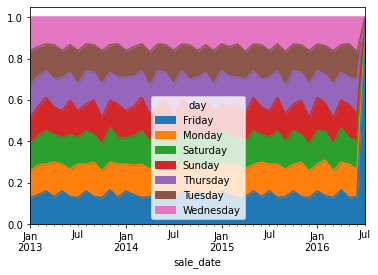

In [97]:
# Now looking at it by day of the week.

train_cut = train.resample("D").mean()
train_cut['day'] = train.index.day_name()
train_cut.groupby("day").resample("M").size().unstack(0).apply(lambda row: row / row.sum(), axis = 1).plot.area()+


In [102]:
train.tail(10)

,sales_total,day
sale_date,,
2016-06-22 00:00:00+00:00,171550.77,Wednesday
2016-06-23 00:00:00+00:00,182449.02,Thursday
2016-06-24 00:00:00+00:00,193442.30,Friday
2016-06-25 00:00:00+00:00,206072.77,Saturday
2016-06-26 00:00:00+00:00,219482.90,Sunday
2016-06-27 00:00:00+00:00,144659.61,Monday
2016-06-28 00:00:00+00:00,169712.82,Tuesday
2016-06-29 00:00:00+00:00,169512.50,Wednesday
2016-06-30 00:00:00+00:00,181861.72,Thursday


#### Takeaway:
So that's why we have such a big spike; this data shows only 1 day, July, and wraps up that entire month's worth of sales into one day. So when I look at it this way, I'd probably just drop that day since it isn't adding much value, at least from the perspective I'm looking at the data now.

In [106]:
train.head()

,sales_total,day
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,Tuesday
2013-01-02 00:00:00+00:00,73570.58,Wednesday
2013-01-03 00:00:00+00:00,78169.48,Thursday
2013-01-04 00:00:00+00:00,84467.73,Friday
2013-01-05 00:00:00+00:00,87621.85,Saturday


Text(0.5, 1.0, '2015')

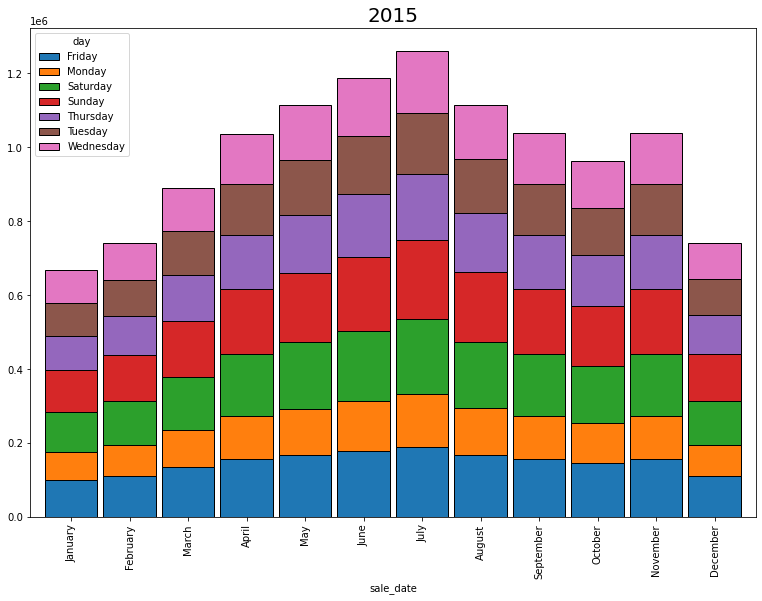

In [168]:
ax = (train['2015']
 .groupby('day')
 .resample('M')
 .sales_total.mean()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black', figsize = (13, 9))
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title("2015", fontsize = 20)

Text(0.5, 1.0, '2016')

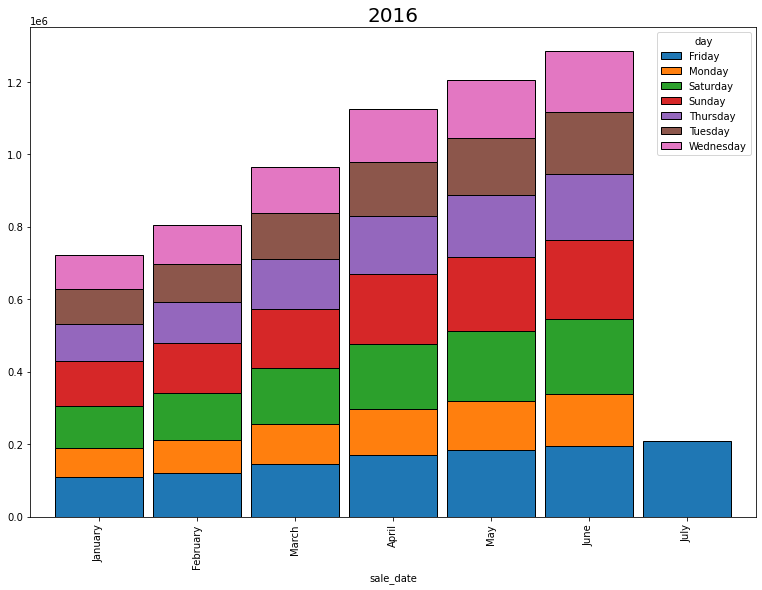

In [167]:
# Now for 2016

ax = (train['2016']
 .groupby('day')
 .resample('M')
 .sales_total.mean()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black', figsize = (13, 9))
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title("2016", fontsize = 20)

Text(0.5, 1.0, '2014')

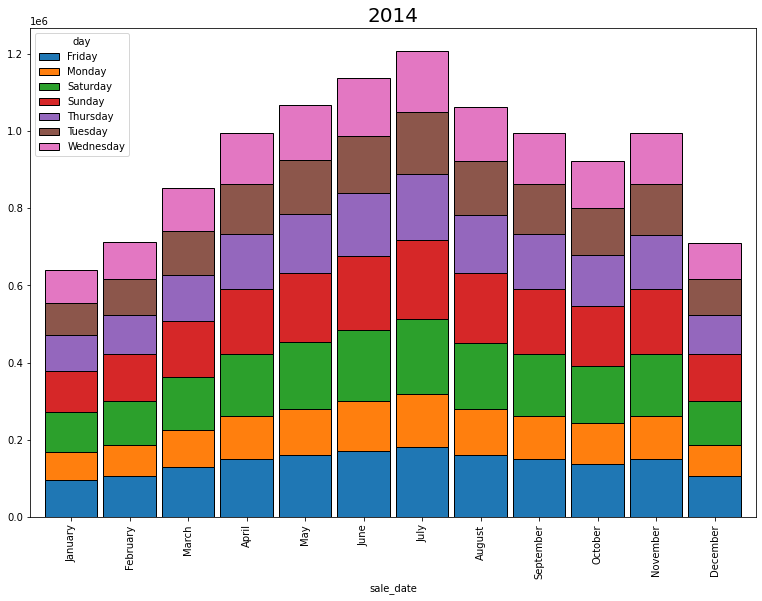

In [166]:
# Now for 2014

ax = (train['2014']
 .groupby('day')
 .resample('M')
 .sales_total.mean()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black', figsize = (13, 9))
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title("2014", fontsize = 20)

Text(0.5, 1.0, '2013')

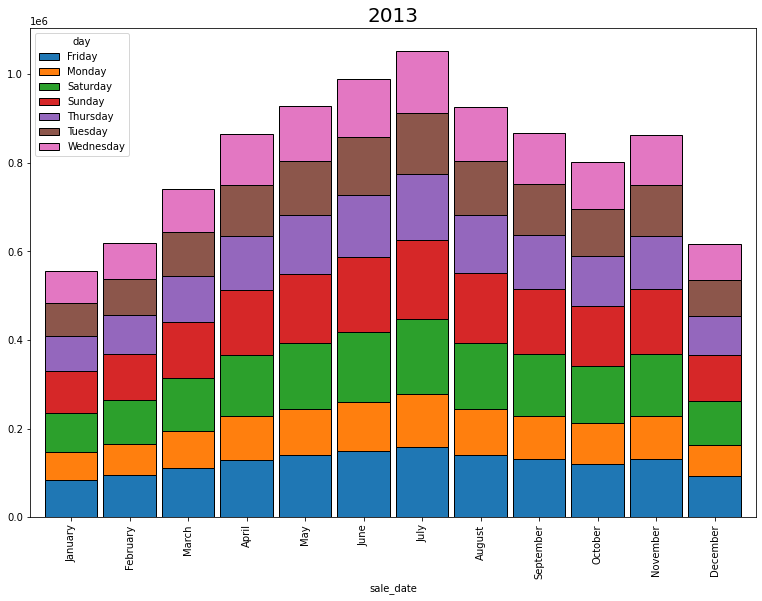

In [169]:
# Now for 2013

ax = (train['2013']
 .groupby('day')
 .resample('M')
 .sales_total.mean()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black', figsize = (13, 9))
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title("2013", fontsize = 20)

#### Takeaway:

- Is there a reason July and Nov have spikes? It seems interesting that Nov has an out of pattern spike in it.

### Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

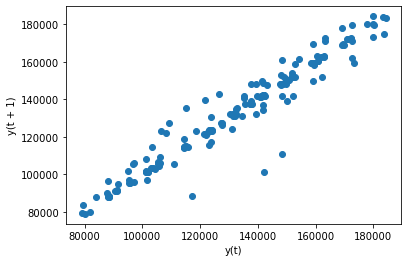

In [100]:
pd.plotting.lag_plot(train.resample("W").mean(), lag = 1)

## OPS Data

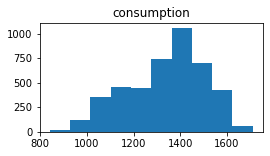

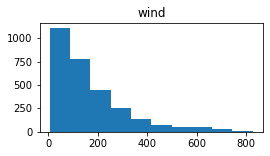

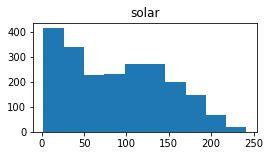

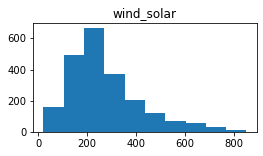

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


In [115]:
ops_df = prepare.prep_ops()
ops_df.head()

In [117]:
# adding day

ops_df['day'] = ops_df.index.day
ops_df['weekday'] = ops_df.index.day_name()

In [118]:
ops_df.head()

,consumption,wind,solar,wind_solar,month,year,day,weekday
date,,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,1,2006,2,Monday
2006-01-03,1442.533,NaN,NaN,NaN,1,2006,3,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,1,2006,4,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,1,2006,5,Thursday


In [122]:
# filling missing values:
ops_df = ops_df.fillna(0)

In [123]:
ops_df.sample(15)

,consumption,wind,solar,wind_solar,month,year,day,weekday
date,,,,,,,,
2009-03-26,1387.610,0.000,0.000,0.000,3,2009,26,Thursday
2016-02-26,1543.553,88.154,77.859,166.013,2,2016,26,Friday
2011-01-31,1553.724,8.913,0.000,0.000,1,2011,31,Monday
2007-10-24,1540.721,0.000,0.000,0.000,10,2007,24,Wednesday
2013-05-23,1326.926,57.184,115.916,173.100,5,2013,23,Thursday
2008-08-18,1337.886,0.000,0.000,0.000,8,2008,18,Monday
2011-04-18,1407.477,34.289,0.000,0.000,4,2011,18,Monday
2009-08-11,1247.121,0.000,0.000,0.000,8,2009,11,Tuesday
2016-05-09,1403.845,360.421,207.427,567.848,5,2016,9,Monday


### Splitting the data

- My data is already in daily increments, so I'll just split it up from here.

In [124]:
ops_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
 6   day          4383 non-null   int64  
 7   weekday      4383 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 308.2+ KB


In [125]:
ops_df.index.dtype

dtype('<M8[ns]')

In [127]:
# Organizing my X and y variables.

ops_df2 = ops_df.consumption.resample("D").sum().reset_index()

In [129]:
X = ops_df2.date
y = ops_df2.consumption

In [131]:
tss = TimeSeriesSplit(n_splits = 5, max_train_size = None)

In [132]:
for train_index, test_index in tss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [133]:
print(X_train.tail())
print(X_test.head())
print(X_test.tail())

3648   2015-12-28
3649   2015-12-29
3650   2015-12-30
3651   2015-12-31
3652   2016-01-01
Name: date, dtype: datetime64[ns]
3653   2016-01-02
3654   2016-01-03
3655   2016-01-04
3656   2016-01-05
3657   2016-01-06
Name: date, dtype: datetime64[ns]
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: date, dtype: datetime64[ns]


#### Validate your splits by plotting X_train and y_train.

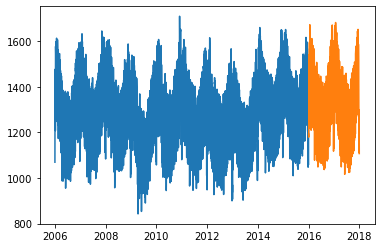

In [134]:
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)

#### Takeaways:

- Appears I have successfully split the data into a train and test datasets.
- From this point on, I will only be using the train dataset to explore.
- **I may want to go back and make the train split smaller in proportion to the whole dataset.** I feel the test sample is too small currently. Only 2 years vs. approx. 9 years on the train section.

In [135]:
# How I want to divide the data:
# By month
# Bin by season

In [148]:
ops_df

,consumption,wind,solar,wind_solar,month,year,day,weekday
date,,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006,1,Sunday
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006,2,Monday
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006,3,Tuesday
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006,4,Wednesday
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006,5,Thursday
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017,27,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017,28,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017,29,Friday


In [153]:
ops_comp = ops_df[['consumption']]
ops_comp.head()

,consumption
date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


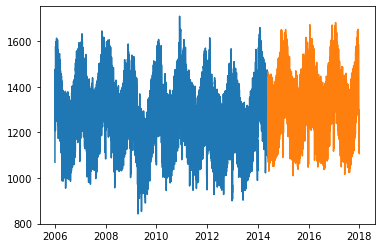

In [154]:
train_size = .70
n = ops_comp.shape[0]
test_start_index = round(train_size * n)

train_ops = ops_comp[:test_start_index] # everything up (not including) to the test_start_index
test_ops = ops_comp[test_start_index:] # everything from the test_start_index to the end

plt.plot(train_ops.index, train_ops.consumption)
plt.plot(test_ops.index, test_ops.consumption)

Plot the weekly average & the 7-day moving average. Compare the 2 plots.

In [155]:
train_ops

,consumption
date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131
...,...
2014-05-22,1459.234
2014-05-23,1429.832
2014-05-24,1199.258


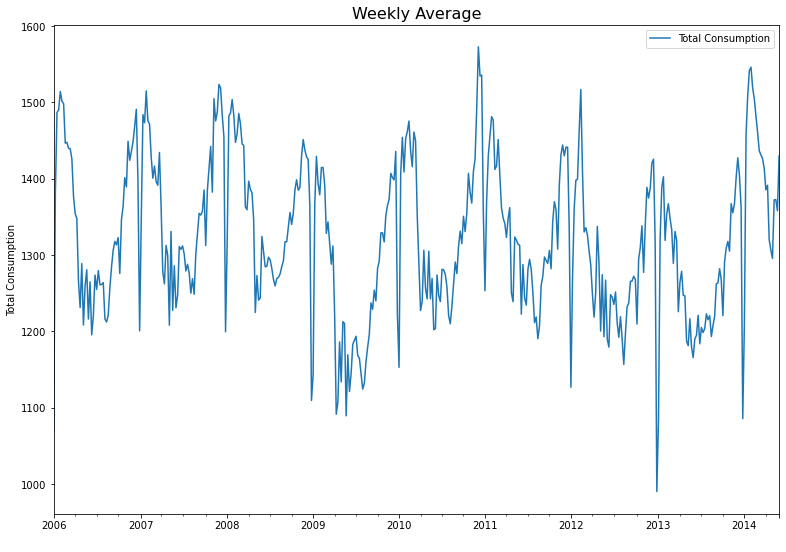

In [158]:
train_ops.resample("W").mean().plot(figsize = (13, 9))
plt.title("Weekly Average", fontsize = 16)
plt.xlabel(" ")
plt.ylabel("Total Consumption")
plt.legend(["Total Consumption"])

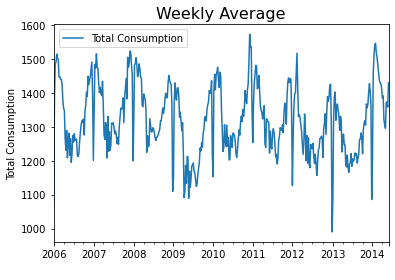

In [196]:
train_ops.resample("W").mean().plot()
plt.title("Weekly Average", fontsize = 16)
plt.xlabel(" ")
plt.ylabel("Total Consumption")
plt.legend(["Total Consumption"])

<AxesSubplot:xlabel='date'>

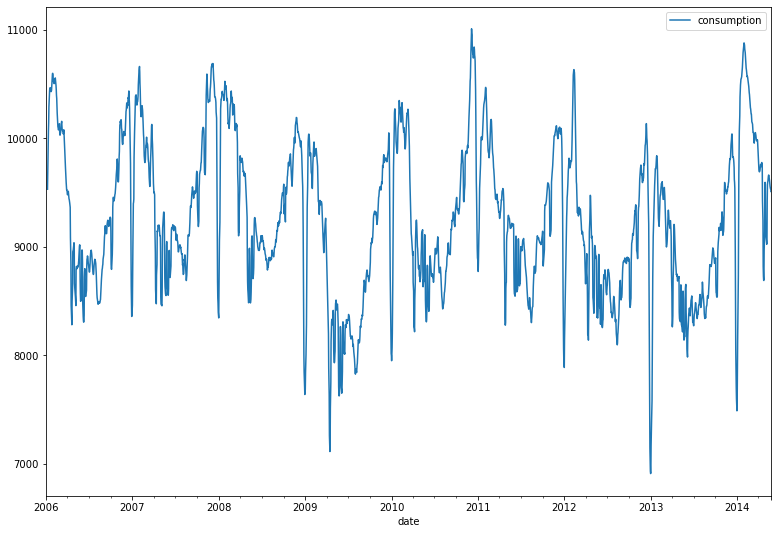

In [171]:
train_ops.rolling(7).sum().plot(figsize = (13, 9))

#### Takeaways:

- Both charts have the same line shape, except the y axis scale is larger for the rolling 7 day. Simple because of the fact that I resampled/grouped by .sum() instead of .mean().

<AxesSubplot:xlabel='date'>

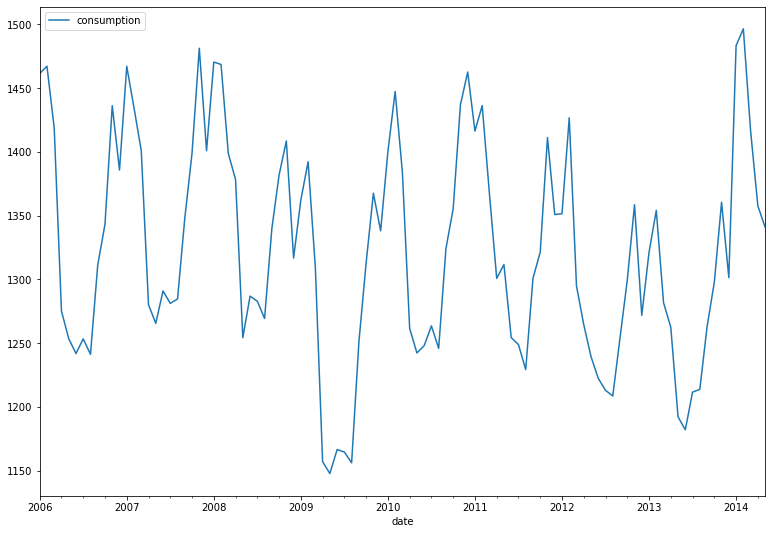

In [190]:
train_ops.resample("M").mean().plot(figsize = (13, 9))

In [195]:
train_ops

,consumption
date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131
...,...
2014-05-22,1459.234
2014-05-23,1429.832
2014-05-24,1199.258


<AxesSubplot:>

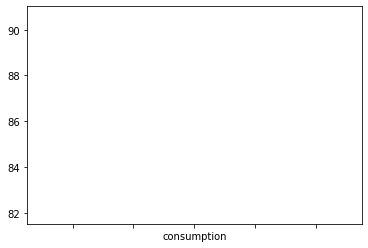

In [194]:
# 7 day moving average:

train_ops("20_day_mov_avg") = train.consumption.rolling(20).mean()

In [200]:
train_ops.head()

,consumption
date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


#### 6. Plot a time series decomposition. Takeaways?

In [198]:
# Decomposition Code DF
y = train_ops.consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
2006-01-01,1069.184000,NaN,-68.437315,NaN
2006-01-08,1381.300143,NaN,-125.834756,NaN
2006-01-15,1486.730286,NaN,35.842411,NaN
2006-01-22,1490.031143,NaN,106.451350,NaN
2006-01-29,1514.176857,NaN,122.022124,NaN


<AxesSubplot:xlabel='date'>

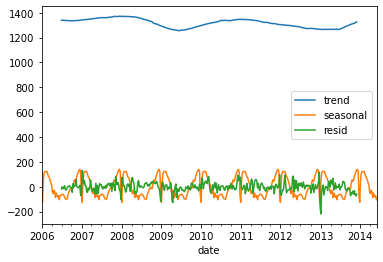

In [201]:
# Decomposition Code: Visual
decomposition.iloc[:, 1:].plot()

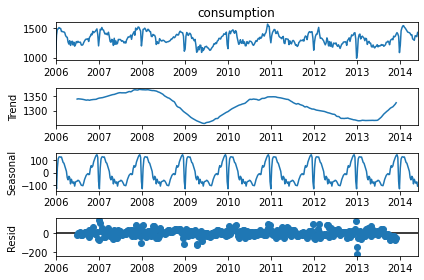

In [207]:
result.plot()
None

#### Takeaways:

- There appears to be a higher degree of error that turn of each year; that can be seen in the `resid` plot.